In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import time

In [0]:
def loadData():
    with np.load('notMNIST.npz') as data :
        Data, Target = data ['images'], data['labels']
        posClass = 2
        negClass = 9
        dataIndx = (Target==posClass) + (Target==negClass)
        Data = Data[dataIndx]/255.
        Target = Target[dataIndx].reshape(-1, 1)
        Target[Target==posClass] = 1
        Target[Target==negClass] = 0
        np.random.seed(421)
        randIndx = np.arange(len(Data))
        np.random.shuffle(randIndx)
        Data, Target = Data[randIndx], Target[randIndx]
        trainData, trainTarget = Data[:3500], Target[:3500]
        validData, validTarget = Data[3500:3600], Target[3500:3600]
        testData, testTarget = Data[3600:], Target[3600:]
    return trainData, validData, testData, trainTarget, validTarget, testTarget

In [0]:
trainData, validData, testData, trainTarget, validTarget, testTarget = loadData()
trainData = trainData.reshape(3500,784)
validData = validData.reshape(100,784)
testData = testData.reshape(145,784)

In [0]:
def MSE(W, b, x, y, reg):
    # Your implementation here
    x = np.insert(x, 0, 1, axis=1)
    W_b = np.insert(W, 0, b)
    y = y.reshape(y.shape[0])
    MSE_Loss = (np.linalg.norm(np.dot(x,W_b) - y)**2)/len(x) + (reg/2)*np.linalg.norm(W)**2
    return MSE_Loss

In [0]:
def gradMSE(W, b, x, y, reg):
    # Your implementation here
    x = np.insert(x, 0, 1, axis=1)
    W_b = np.insert(W, 0, b)
    y = y.reshape(y.shape[0])
    grad_wb = (2*np.dot(np.transpose(x),(np.dot(x,W_b) - y)))/len(x) + reg*W_b
    return grad_wb[1:], grad_wb[0]

In [0]:
def accuracy(W, b, x, y):
   x = np.insert(x, 0, 1, axis=1)
   W_b = np.insert(W, 0, b)
   y = y.reshape(y.shape[0])
   pred = np.dot(x,W_b)
   pred = np.where(pred >= 0.5, 1, 0)
   accuracy = np.sum(pred == y)/len(pred)
   return accuracy

In [0]:
def grad_descent(W, b, x, y, v_x, v_y, test_x, test_y, alpha, epochs, reg, error_tol):
    # Your implementation here
    training_loss = []
    training_accuracy = []
    validation_loss = []
    validation_accuracy = []
    test_loss = []
    test_accuracy = []
    for i in range(epochs):
        dl_dw, dl_db = gradMSE(W, b, x, y, reg) # The gradient based on loss for each image
        W_new = W - alpha*(dl_dw) # Updates weights
        b -= alpha*(dl_db) # Updates bias

        if (np.linalg.norm(W_new - W) < error_tol):
            return [W, b, training_loss, validation_loss, test_loss, training_accuracy, validation_accuracy, test_accuracy]
  
        W = W_new
        # Training Loss:
        t_accuracy = accuracy(W,b,x,y)
        t_loss = MSE(W, b, x, y, reg)
        print("Epoch: %d, Training Loss: %0.2f, Training Accuracy: %0.2f" % (i, t_loss, t_accuracy))
        training_loss += [t_loss]
        training_accuracy += [t_accuracy]

        # Validation Loss:
        v_accuracy = accuracy(W,b,v_x,v_y)
        v_loss = MSE(W, b, v_x, v_y, reg)
        print("Epoch: %d, Validation Loss: %0.2f, Validation Accuracy: %0.2f" % (i, v_loss, v_accuracy))
        validation_loss += [v_loss]
        validation_accuracy += [v_accuracy]

        # Testing Loss:
        test_acc = accuracy(W,b,test_x,test_y)
        te_loss = MSE(W, b, test_x, test_y, reg)
        print("Epoch: %d, Testing Loss: %0.2f, Testing Accuracy: %0.2f" % (i, te_loss, test_acc))
        test_loss += [te_loss]
        test_accuracy += [test_acc]
      
    return [W, b, training_loss, validation_loss, test_loss, training_accuracy, validation_accuracy, test_accuracy]

In [0]:
# Initialize Parameters and Hyperparameters:
W_i = np.random.rand(28*28)
W_i = W_i/np.linalg.norm(W_i)
b_i = 0
l_r = [0.005, 0.001, 0.0001]
reg = 0 #[0.001, 0.1, 0.5]
epochs = 5000
error_tol = 10**-7

In [0]:
# Collecting the data:

weight = np.empty([len(l_r), 28*28])
bias = np.empty([len(l_r), 1])
training_error = np.empty([len(l_r), epochs])
training_accuracy = np.empty([len(l_r), epochs])
validation_error = np.empty([len(l_r), epochs])
validation_accuracy = np.empty([len(l_r), epochs])
testing_error = np.empty([len(l_r), epochs])
testing_accuracy = np.empty([len(l_r), epochs])

In [0]:
W = W_i
b = b_i
r = 1
[weight[r], bias[r], training_error[r], validation_error[r], testing_error[r], training_accuracy[r], validation_accuracy[r], testing_accuracy[r]] = grad_descent(W, b, trainData, trainTarget, validData, validTarget, testData, testTarget, l_r[r], epochs, reg, error_tol)

Epoch: 0, Training Loss: 42.43, Training Accuracy: 0.50
Epoch: 0, Validation Loss: 46.06, Validation Accuracy: 0.51
Epoch: 0, Testing Loss: 45.15, Testing Accuracy: 0.45
Epoch: 1, Training Loss: 22.78, Training Accuracy: 0.50
Epoch: 1, Validation Loss: 25.41, Validation Accuracy: 0.51
Epoch: 1, Testing Loss: 24.29, Testing Accuracy: 0.45
Epoch: 2, Training Loss: 12.42, Training Accuracy: 0.50
Epoch: 2, Validation Loss: 14.37, Validation Accuracy: 0.51
Epoch: 2, Testing Loss: 13.27, Testing Accuracy: 0.45
Epoch: 3, Training Loss: 6.94, Training Accuracy: 0.50
Epoch: 3, Validation Loss: 8.43, Validation Accuracy: 0.52
Epoch: 3, Testing Loss: 7.43, Testing Accuracy: 0.46
Epoch: 4, Training Loss: 4.04, Training Accuracy: 0.50
Epoch: 4, Validation Loss: 5.19, Validation Accuracy: 0.52
Epoch: 4, Testing Loss: 4.32, Testing Accuracy: 0.46
Epoch: 5, Training Loss: 2.49, Training Accuracy: 0.51
Epoch: 5, Validation Loss: 3.41, Validation Accuracy: 0.52
Epoch: 5, Testing Loss: 2.66, Testing Accu

In [0]:
def plotting_loss(epoch, training_error, validation_error, testing_error, title):
    epoch_idx = np.arange(0, epoch)
    plt.figure(figsize=(10,10))
    plt.plot(epoch_idx,training_error)
    plt.plot(epoch_idx,validation_error)
    plt.plot(epoch_idx,testing_error)
    plt.xlabel('Number of Epochs')
    plt.ylabel('Loss')
    plt.legend(['Training Loss', 'Validation Loss', 'Testing Loss'])
    plt.title(title)
    plt.show()

In [0]:
plotting_loss(epochs, training_error[0], validation_error[0], testing_error[0],"MSE Losses of BGD w/ lr of 0.005 on notMNIST")

/usr/local/lib/python3.6/dist-packages/matplotlib/transforms.py:2832: RuntimeWarning: overflow encountered in double_scalars
  elif vmax - vmin <= maxabsvalue * tiny:
/usr/local/lib/python3.6/dist-packages/matplotlib/transforms.py:417: RuntimeWarning: overflow encountered in double_scalars
  return (x0, y0, x1 - x0, y1 - y0)
/usr/local/lib/python3.6/dist-packages/matplotlib/ticker.py:1832: RuntimeWarning: overflow encountered in double_scalars
  dv = abs(vmax - vmin)  # > 0 as nonsingular is called before.
/usr/local/lib/python3.6/dist-packages/matplotlib/ticker.py:2038: RuntimeWarning: overflow encountered in double_scalars
  raw_step = (_vmax - _vmin) / nbins
/usr/local/lib/python3.6/dist-packages/matplotlib/ticker.py:2045: RuntimeWarning: invalid value encountered in greater_equal
  istep = np.nonzero(steps >= raw_step)[0][0]


IndexError: ignored

<Figure size 720x720 with 1 Axes>

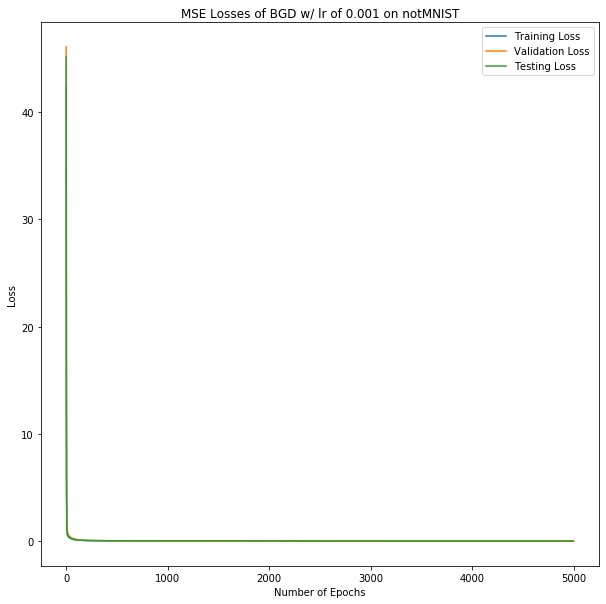

In [0]:
plotting_loss(epochs, training_error[1], validation_error[1], testing_error[1], "MSE Losses of BGD w/ lr of 0.001 on notMNIST")

/usr/local/lib/python3.6/dist-packages/matplotlib/transforms.py:2832: RuntimeWarning: overflow encountered in double_scalars
  elif vmax - vmin <= maxabsvalue * tiny:
/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_base.py:2477: RuntimeWarning: overflow encountered in double_scalars
  delta = (x1t - x0t) * margin


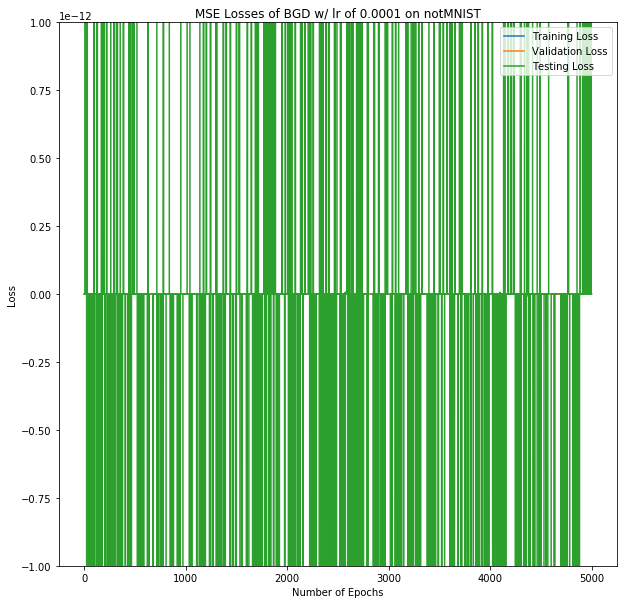

In [0]:
plotting_loss(epochs, training_error[2], validation_error[2], testing_error[2], "MSE Losses of BGD w/ lr of 0.0001 on notMNIST")

In [0]:
def plotting_accuracy(epoch, training_accuracy, validation_accuracy, testing_accuracy, title):
    epoch_idx = np.arange(0, epoch)
    plt.figure(figsize=(10,10))
    plt.plot(epoch_idx,training_accuracy)
    plt.plot(epoch_idx,validation_accuracy)
    plt.plot(epoch_idx,testing_accuracy)
    plt.xlabel('Number of Epochs')
    plt.ylabel('Accuracy')
    plt.legend(['Training Accuracy', 'Validation Accuracy', 'Testing Accuracy'])
    plt.title(title)
    plt.show()

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_base.py:2483: RuntimeWarning: overflow encountered in double_scalars
  x0t -= delta


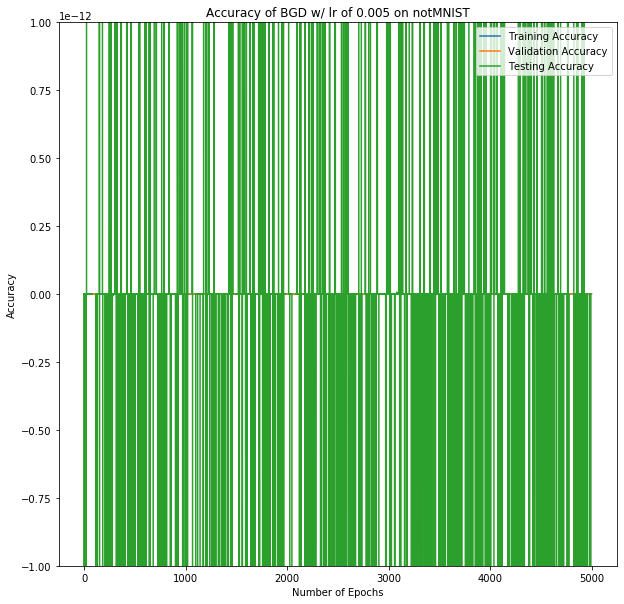

In [0]:
plotting_accuracy(epochs, training_accuracy[0], validation_accuracy[0], testing_accuracy[0], "Accuracy of BGD w/ lr of 0.005 on notMNIST")

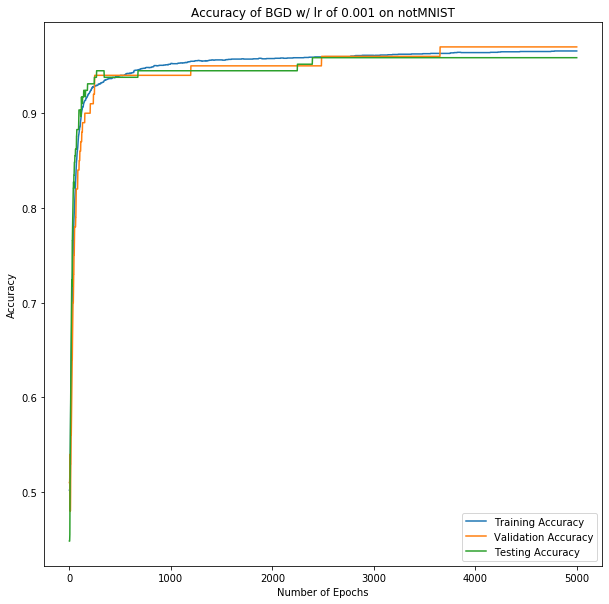

In [0]:
plotting_accuracy(epochs, training_accuracy[1], validation_accuracy[1], testing_accuracy[1], "Accuracy of BGD w/ lr of 0.001 on notMNIST")

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_base.py:2483: RuntimeWarning: overflow encountered in double_scalars
  x0t -= delta


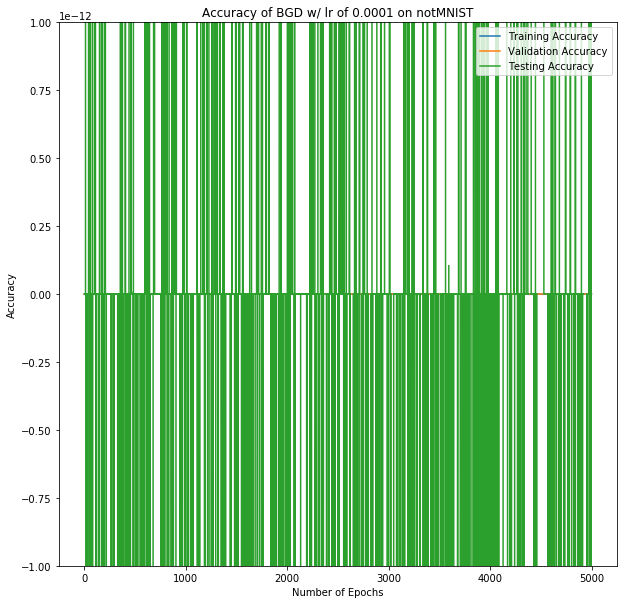

In [0]:
plotting_accuracy(epochs, training_accuracy[2], validation_accuracy[2], testing_accuracy[2], "Accuracy of BGD w/ lr of 0.0001 on notMNIST")

In [0]:
# Regularization:

In [0]:
plotting_loss(epochs, training_error[0], validation_error[0], testing_error[0],"MSE Losses of BGD w/ Regularization of 0.001 on notMNIST")

/usr/local/lib/python3.6/dist-packages/matplotlib/transforms.py:2832: RuntimeWarning: overflow encountered in double_scalars
  elif vmax - vmin <= maxabsvalue * tiny:
/usr/local/lib/python3.6/dist-packages/matplotlib/transforms.py:417: RuntimeWarning: overflow encountered in double_scalars
  return (x0, y0, x1 - x0, y1 - y0)
/usr/local/lib/python3.6/dist-packages/matplotlib/ticker.py:1832: RuntimeWarning: overflow encountered in double_scalars
  dv = abs(vmax - vmin)  # > 0 as nonsingular is called before.
/usr/local/lib/python3.6/dist-packages/matplotlib/ticker.py:2038: RuntimeWarning: overflow encountered in double_scalars
  raw_step = (_vmax - _vmin) / nbins
/usr/local/lib/python3.6/dist-packages/matplotlib/ticker.py:2045: RuntimeWarning: invalid value encountered in greater_equal
  istep = np.nonzero(steps >= raw_step)[0][0]


IndexError: ignored

<Figure size 720x720 with 1 Axes>

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_base.py:2483: RuntimeWarning: overflow encountered in double_scalars
  x0t -= delta


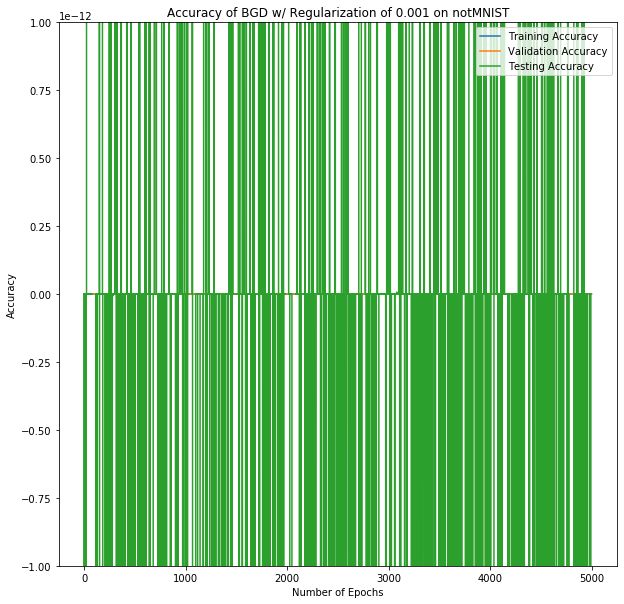

In [0]:
plotting_accuracy(epochs, training_accuracy[0], validation_accuracy[0], testing_accuracy[0], "Accuracy of BGD w/ Regularization of 0.001 on notMNIST")

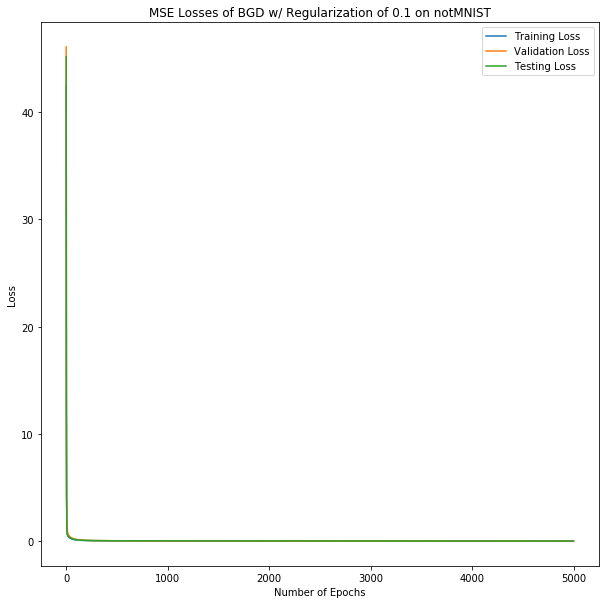

In [0]:
plotting_loss(epochs, training_error[1], validation_error[1], testing_error[1],"MSE Losses of BGD w/ Regularization of 0.1 on notMNIST")

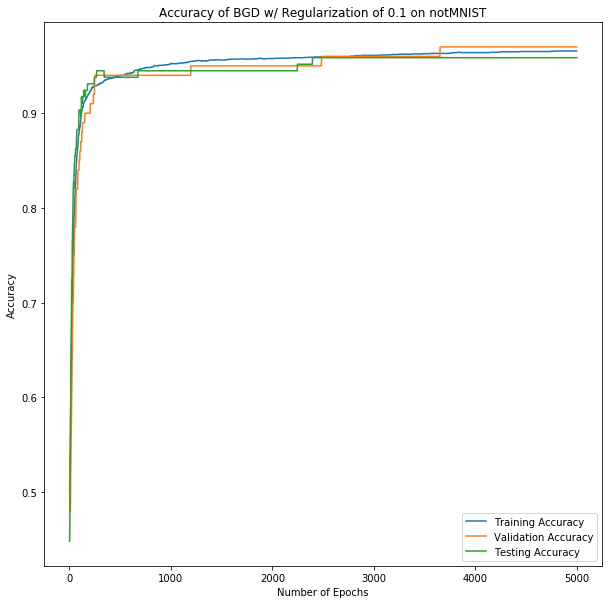

In [0]:
plotting_accuracy(epochs, training_accuracy[1], validation_accuracy[1], testing_accuracy[1], "Accuracy of BGD w/ Regularization of 0.1 on notMNIST")

/usr/local/lib/python3.6/dist-packages/matplotlib/transforms.py:2832: RuntimeWarning: overflow encountered in double_scalars
  elif vmax - vmin <= maxabsvalue * tiny:
/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_base.py:2477: RuntimeWarning: overflow encountered in double_scalars
  delta = (x1t - x0t) * margin


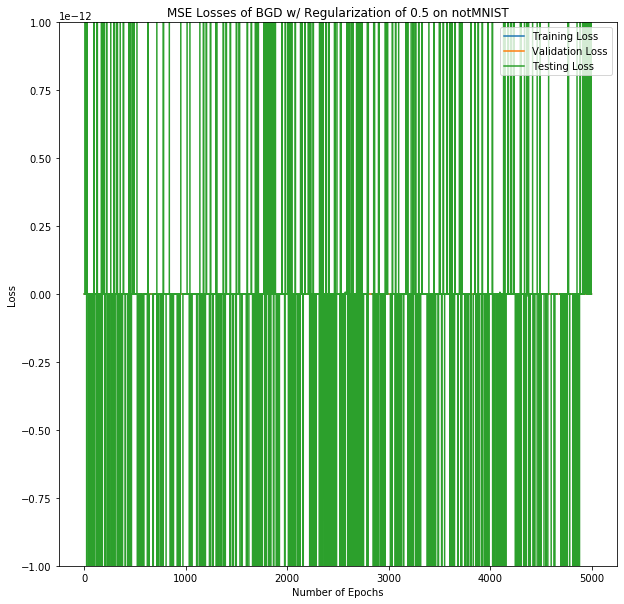

In [0]:
plotting_loss(epochs, training_error[2], validation_error[2], testing_error[2],"MSE Losses of BGD w/ Regularization of 0.5 on notMNIST")

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_base.py:2483: RuntimeWarning: overflow encountered in double_scalars
  x0t -= delta


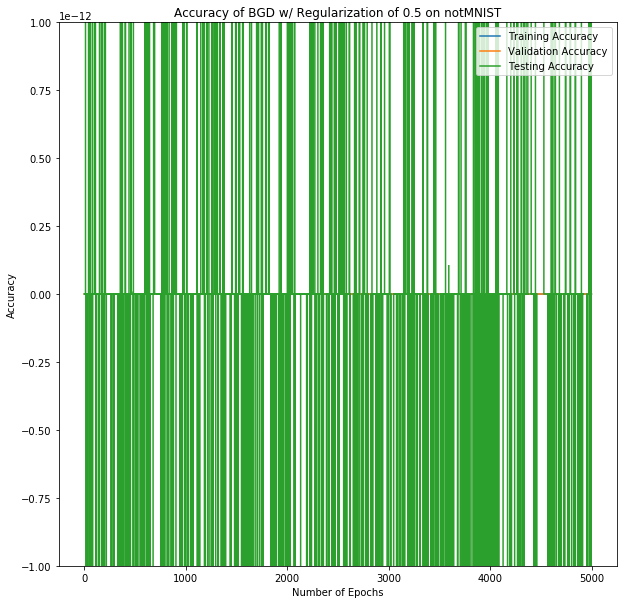

In [0]:
plotting_accuracy(epochs, training_accuracy[2], validation_accuracy[2], testing_accuracy[2], "Accuracy of BGD w/ Regularization of 0.5 on notMNIST")

In [0]:
def normal_equation(x,y):
    init_t = time.time()
    x = np.insert(x, 0, 1, axis=1)
    W_opt = (np.linalg.inv(np.dot(x.transpose(),x))).dot(x.transpose()).dot(y)
    final_t = time.time()
    print("Time: ", final_t - init_t)
    return [W_opt[1:], W_opt[0]]

In [0]:
[W_optimal, b] = normal_equation(trainData, trainTarget)
reg = 0.5

Time:  0.36717939376831055


In [0]:
print("Normal Equation Training MSE: ", MSE(W_optimal.transpose(), b, trainData, trainTarget, reg))
print("Normal Equation Training Accuracy: ", accuracy(W_optimal.transpose(), b, trainData, trainTarget))

Normal Equation Training MSE:  3.0501595221812434
Normal Equation Training Accuracy:  0.9937142857142857


In [0]:
print("Normal Equation Validation MSE: ", MSE(W_optimal.transpose(), b, validData, validTarget, reg))
print("Normal Equation Validation Accuracy: ", accuracy(W_optimal.transpose(), b, validData, validTarget))

Normal Equation Validation MSE:  3.079015902689379
Normal Equation Validation Accuracy:  0.96


In [0]:
print("Normal Equation Testing MSE: ", MSE(W_optimal.transpose(), b, testData, testTarget, reg))
print("Normal Equation Testing Accuracy: ", accuracy(W_optimal.transpose(), b, testData, testTarget))

Normal Equation Testing MSE:  3.088434914221085
Normal Equation Testing Accuracy:  0.9448275862068966
